# Pandas Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [4]:
# see the pre-defined styles provided.
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [5]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [6]:
np.random.seed(123)  ## allows us to reproduce the data

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
## cumsum(0)  cumulative sums an array
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


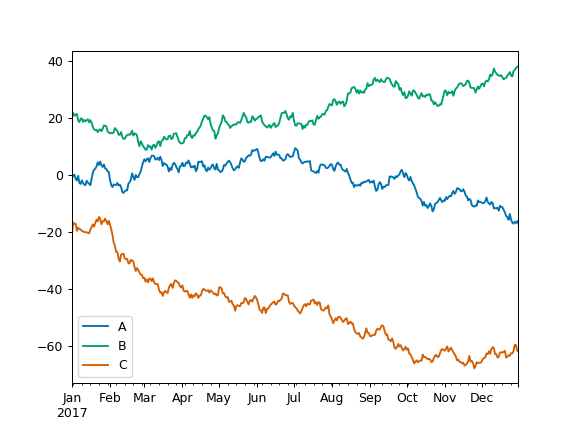

In [11]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output
## .plot() method on series and DataFrame is a simple wrapper around plt.plot

We can select which plot we want to use by passing it into the 'kind' parameter.

<IPython.core.display.Javascript object>


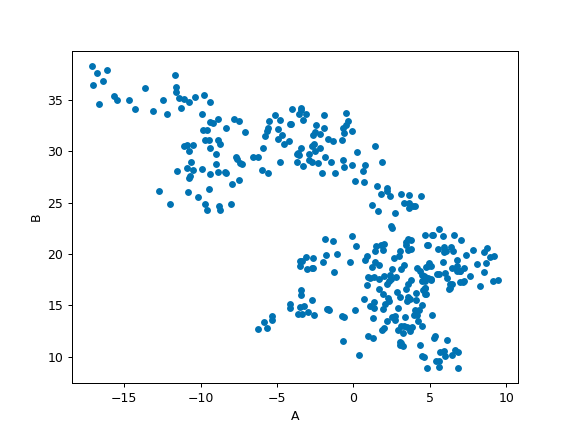

In [12]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


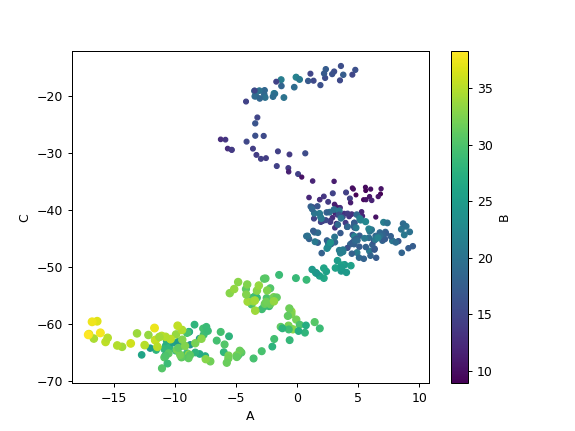

In [13]:
## besides passing the kind to the kind parameter, we can also use df.plot.kind() such as below
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
## data points vary in color and size, color and size are based on the column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


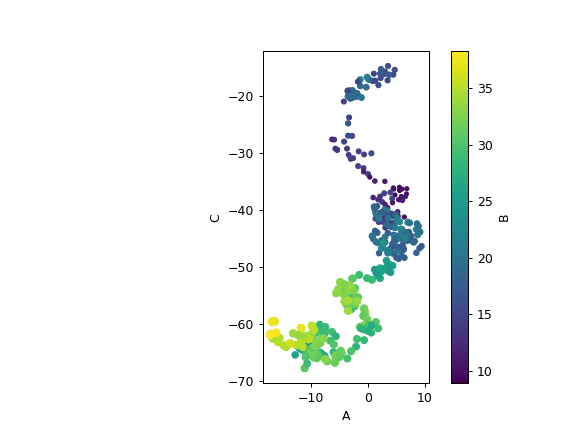

In [14]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')   ## according to the subplots.axes
## Setting the aspect ratio to equal allows the viewer to see the range of variables and compare

<IPython.core.display.Javascript object>


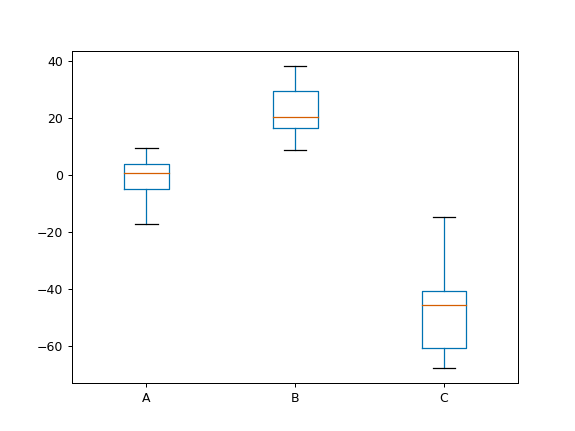

In [15]:
df.plot.box();

<IPython.core.display.Javascript object>


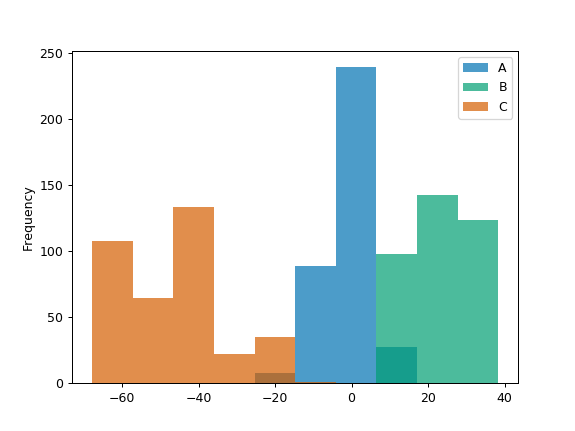

In [16]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

<IPython.core.display.Javascript object>


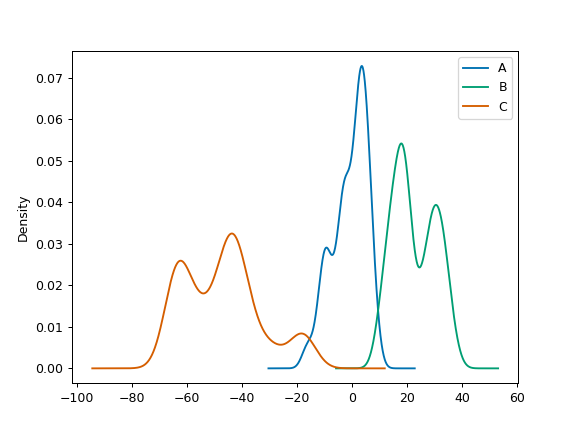

In [17]:
df.plot.kde();  ## kernel density estimation plots

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [3]:
from sklearn.datasets import load_iris
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
pd.tools.plotting.scatter_matrix(iris);
## This is the pandas package installing problem
## This will have a matrix of plots of pairwise comparison 

AttributeError: module 'pandas' has no attribute 'tools'

<IPython.core.display.Javascript object>


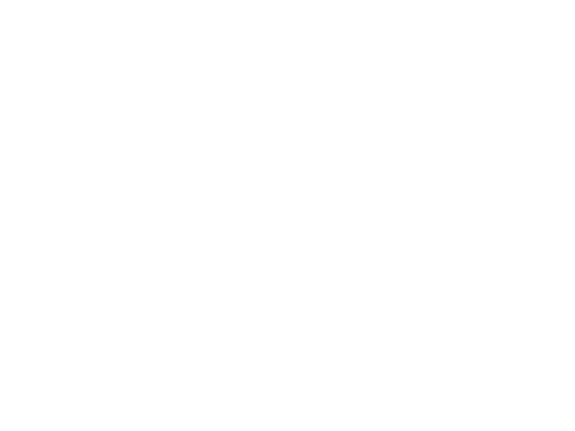

AttributeError: module 'pandas' has no attribute 'tools'

In [6]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Variety');   ## create multivariate plots
## parallel_coordinates is a way of visualizing high dimensional multivariate data
## Each variable in the dataset corresponds to an equally spaced parallel vertical line. 
## The values of each variable are then connected by lines between each individual observation/.

# Seaborn

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## seaborn is a powerfal package for statistical plotting
%matplotlib notebook

In [11]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
print(v1.head())
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')
print(v2.head())

0     4.714352
1   -11.909757
2    14.327070
3    -3.126519
4    -7.205887
Name: v1, dtype: float64
0    45.695583
1    11.877633
2    89.352568
3    28.549529
4    66.526610
Name: v2, dtype: float64


<IPython.core.display.Javascript object>


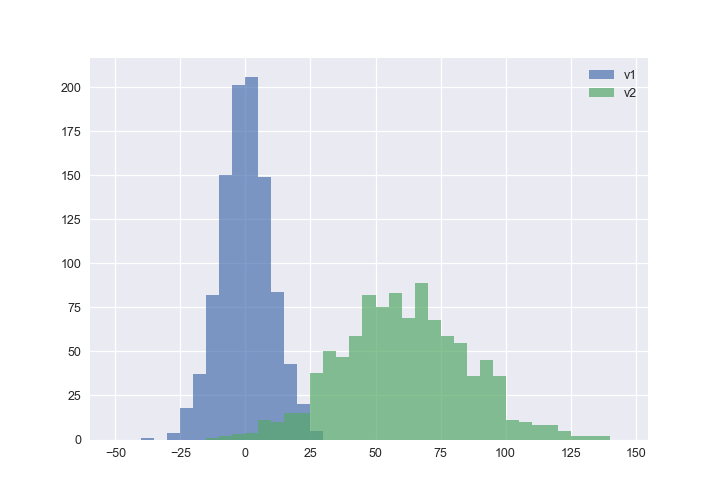

In [12]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();
## for the bins number, we can pass an absolute number or just a specific sequence

<IPython.core.display.Javascript object>


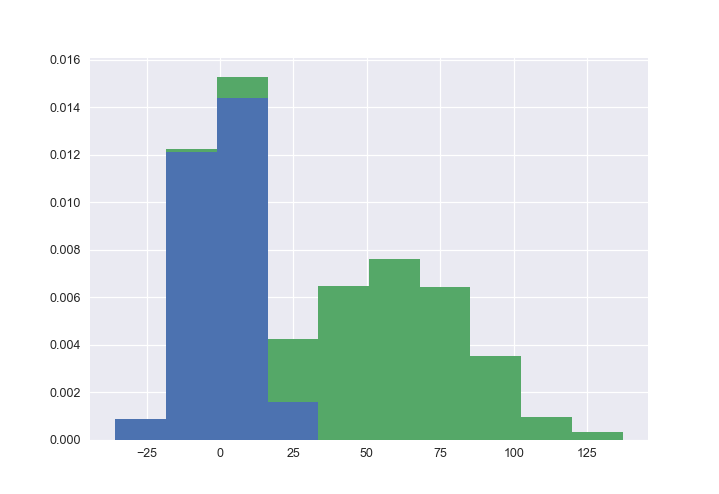

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


<IPython.core.display.Javascript object>


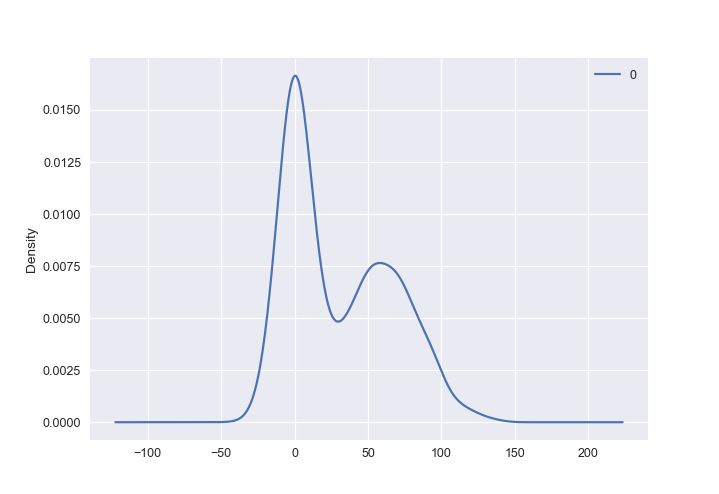

In [21]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
## normed = True will normailize the histogram to form a probability density
v3 = np.concatenate((v1,v2))
## sns.kdeplot(v3);  ## package version problem
pd.DataFrame(v3).plot(kind = 'kde')

<IPython.core.display.Javascript object>


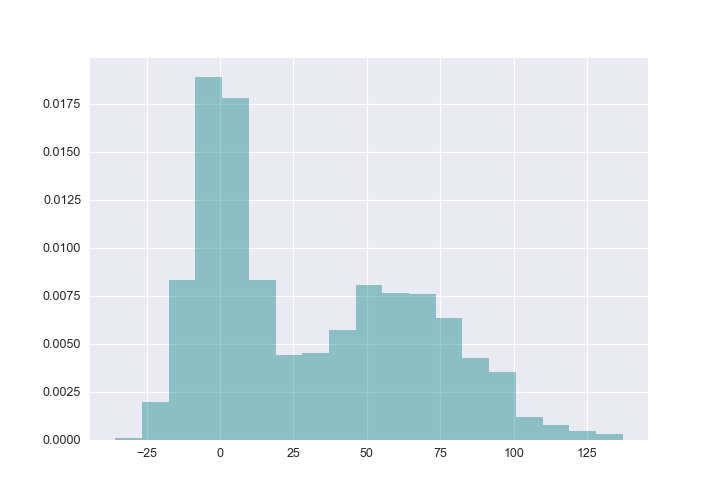

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


TypeError: slice indices must be integers or None or have an __index__ method

In [22]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
## Need to upgrade the statsmodels to 0.8.0, currently 0.6.0

<IPython.core.display.Javascript object>


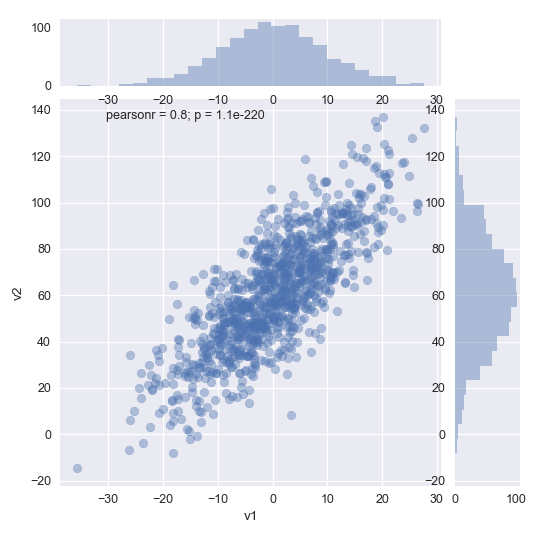

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


In [23]:
sns.jointplot(v1, v2, alpha=0.4);
## seaborn.jointplot creates a scatterplot along the histograms for each individual variable on each axis
## it can be concluded that v1 and v2 appear to be normally distributed variables that are positively correlated.

<IPython.core.display.Javascript object>


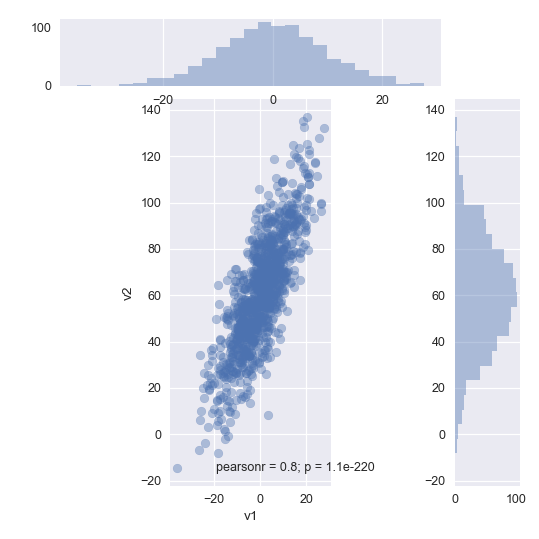

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


In [24]:
## Because seaborn is based on matplotlib, that we can tweak the plots using matplotlib's tools
## Some of the plotting functions in seaborn return a matplotlib axis object, while others operate on an entire figure
## produce plots with several panels returning a seaborn grib object, thus matplotlib can be used to tweak the plot
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


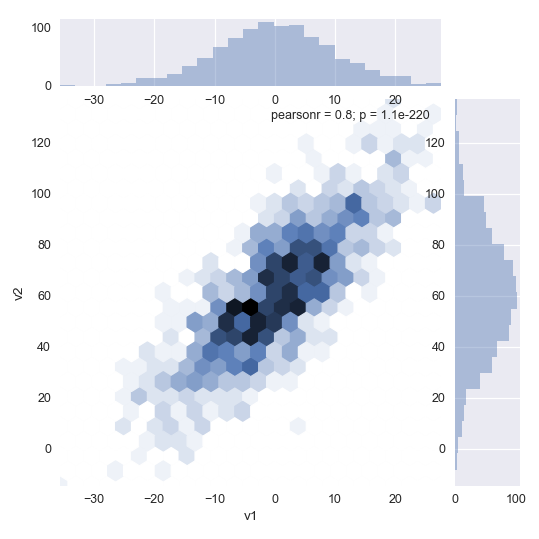

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


In [25]:
sns.jointplot(v1, v2, kind='hex');
## hexbin plots are the bivariate counterpart to histograms

In [32]:
# set the seaborn style for all the following plots
sns.set_style('white')  ## turn off the grey grid
## two dimensional kde is the continuous version of hexbin plots
sns.jointplot(v1, v2, kind='kde', space=0);
## space = 0 will plot the marginal distributions directly on the border of the scatter plot


<IPython.core.display.Javascript object>

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: slice indices must be integers or None or have an __index__ method

In [33]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [35]:
sns.pairplot(iris, hue='variety', diag_kind='kde', size=2);
## hue = 'variety' is different colors for differen groups, use the 'kde' plots as the diagnal plots instead of histograms 

<IPython.core.display.Javascript object>

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: slice indices must be integers or None or have an __index__ method

<IPython.core.display.Javascript object>


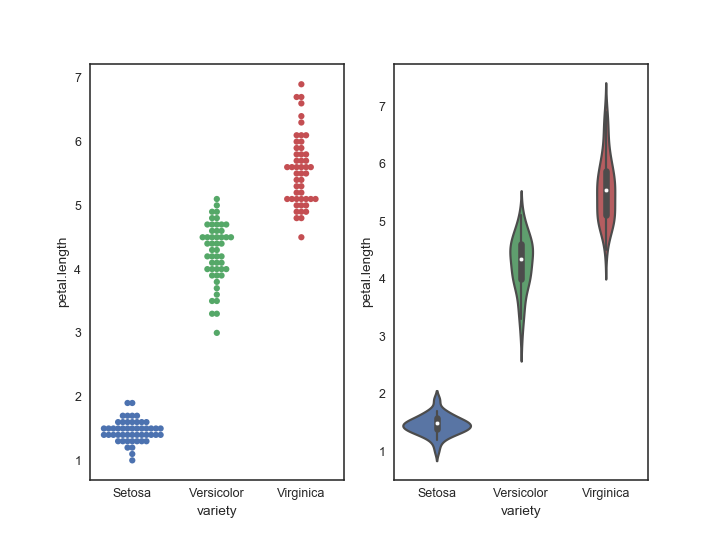

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [38]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('variety', 'petal.length', data=iris);
plt.subplot(122)
sns.violinplot('variety', 'petal.length', data=iris);
## Voilin plots like rotate kernel density estimation, this is useful for multi modality